Problem Statement: Abalone Age Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
data=pd.read_csv("abalone.csv")

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

In [5]:
data.size

37593

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Data Analysis & Visualization

Univariate Analysis

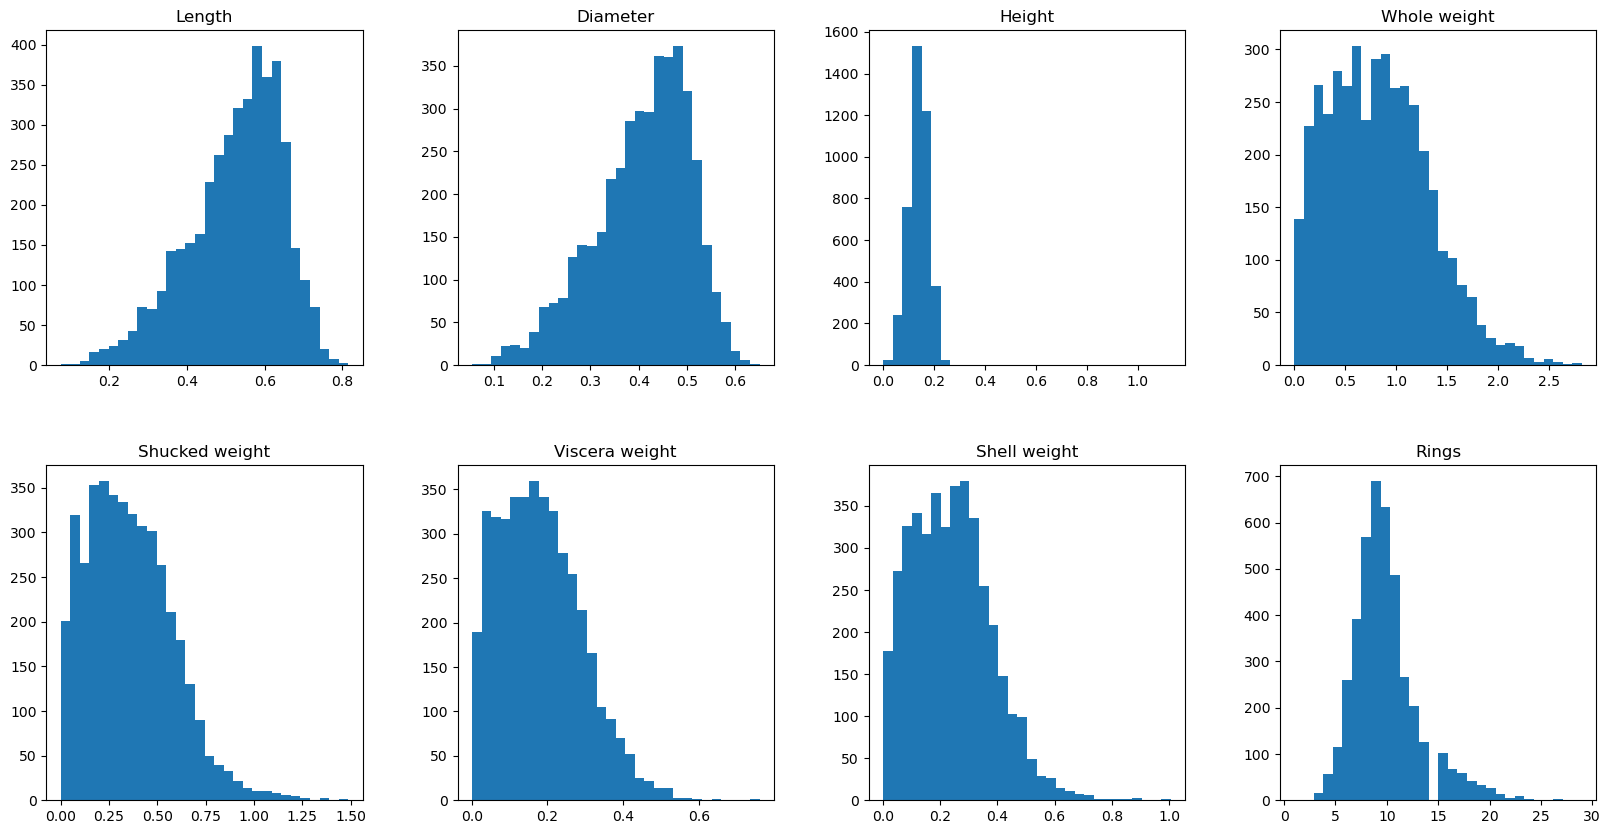

In [7]:
data.hist(figsize=(20,10), grid=False, layout=(2,4), bins=30)
plt.show()

<AxesSubplot:ylabel='Frequency'>

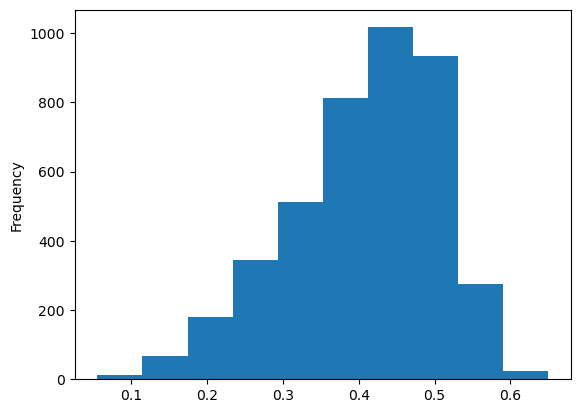

In [8]:
data["Diameter"].plot(kind='hist')

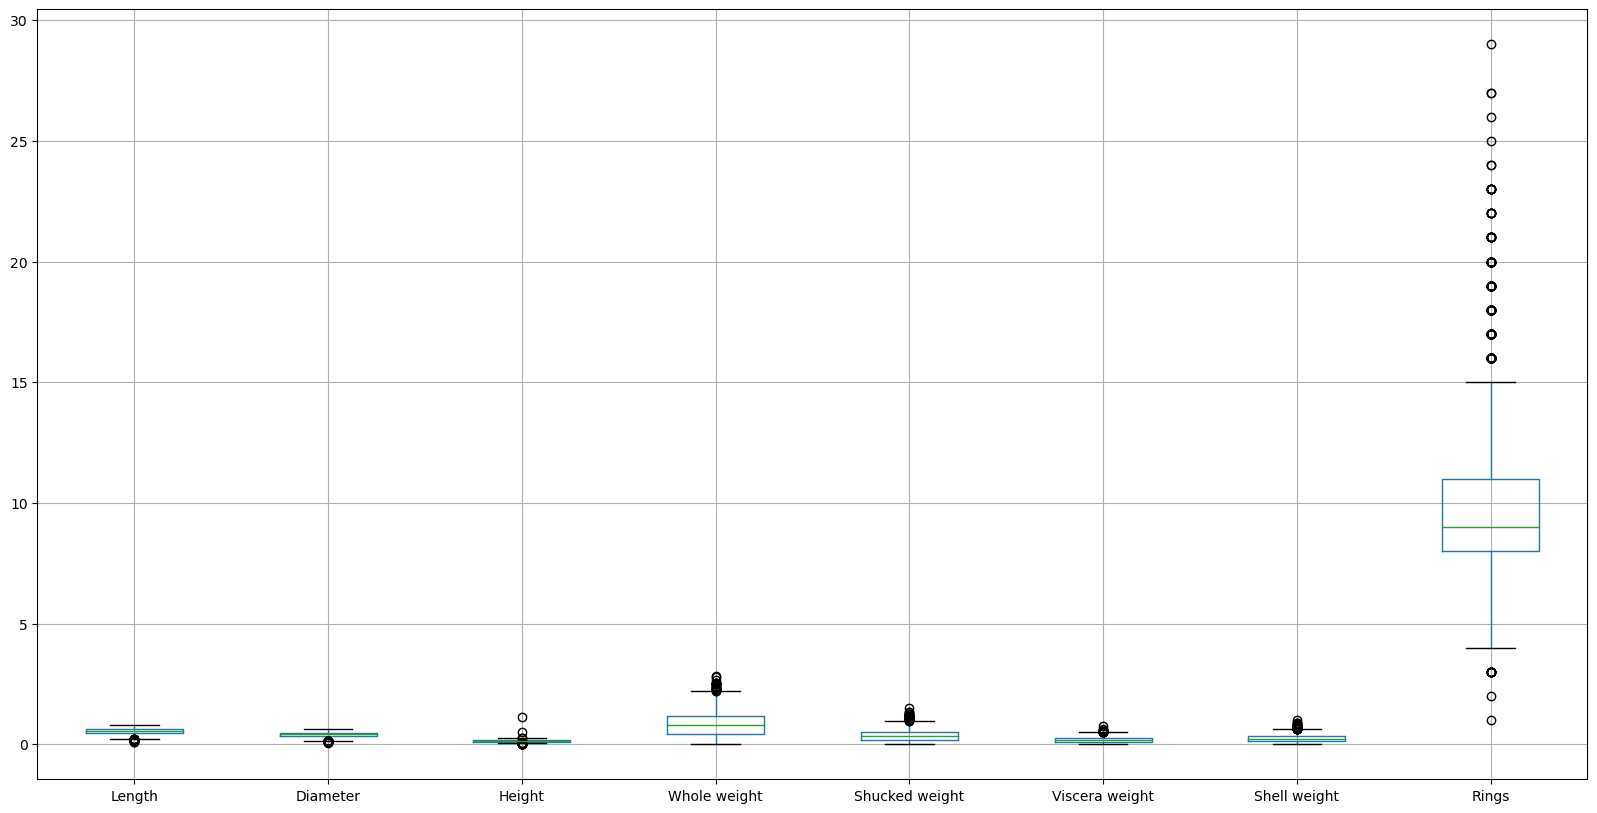

In [9]:
data.boxplot(figsize=(20,10))
plt.show()

Bivariate Analysis

In [10]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


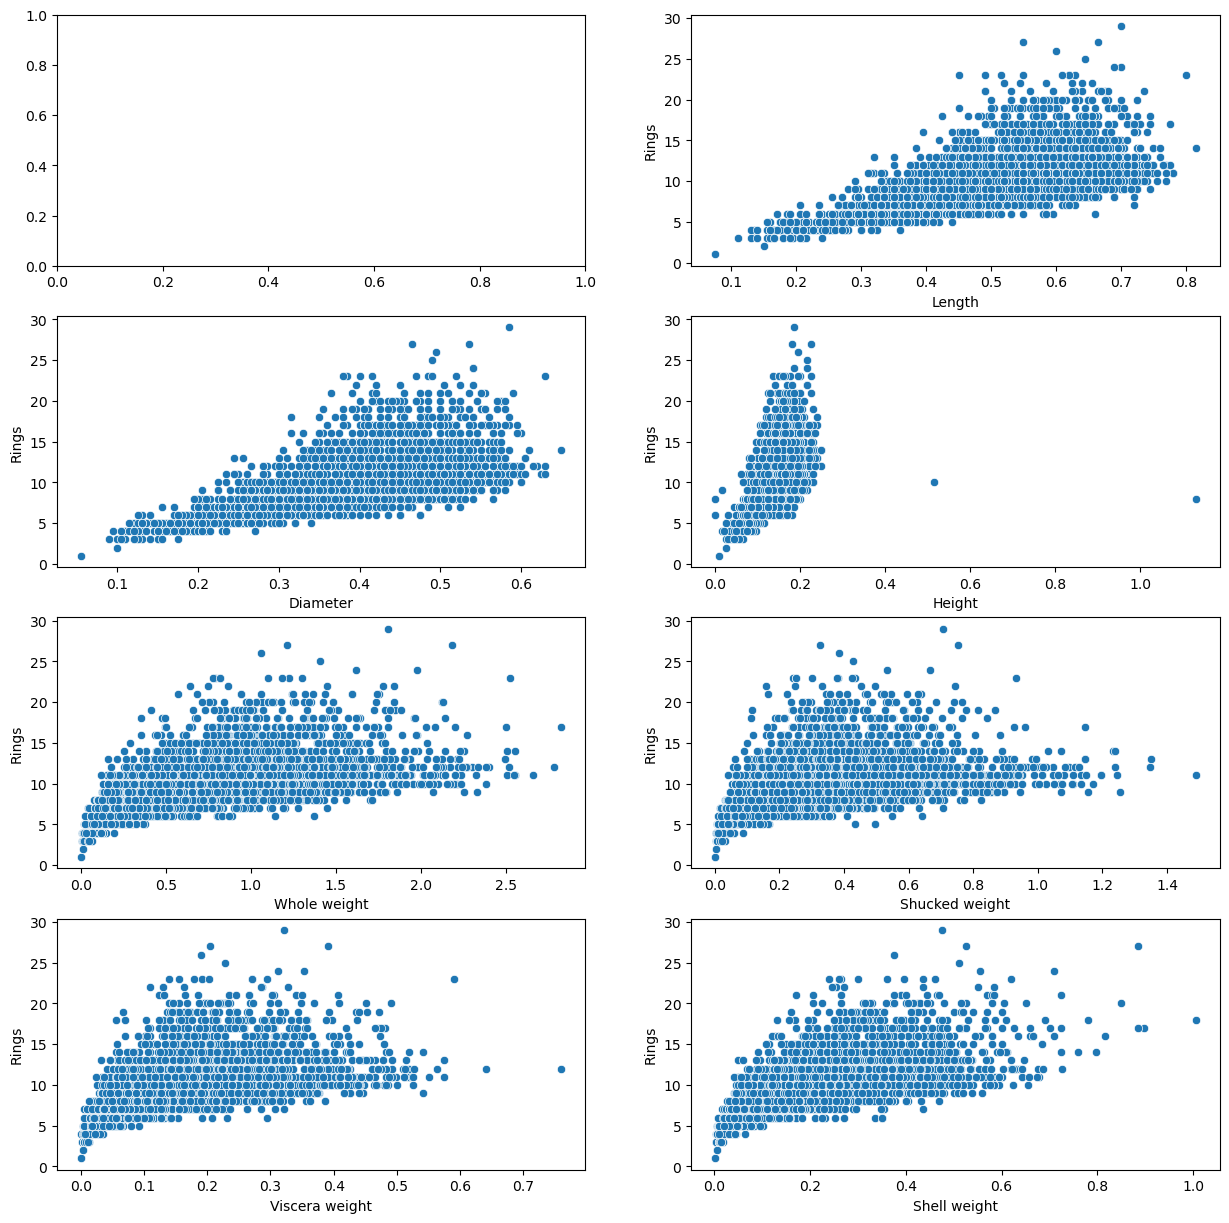

In [11]:
fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.flatten()
for i in range(1,len(data.columns)-1):
    sns.scatterplot(x=data.iloc[:,i], y=data['Rings'], ax=axes[i])
plt.show()

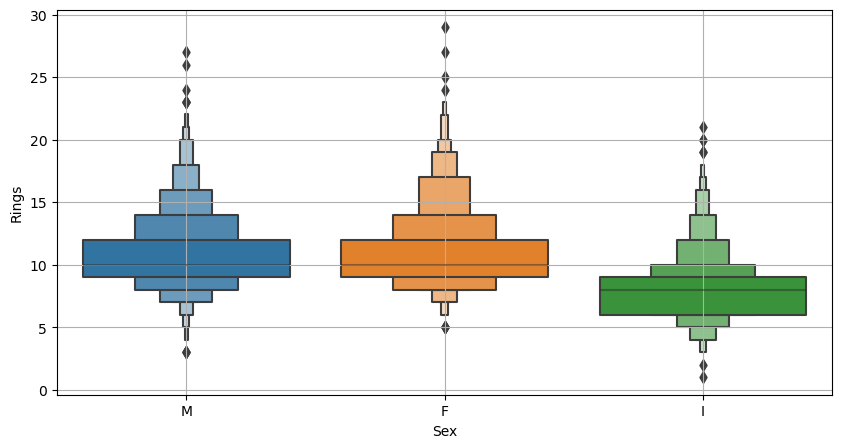

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,11.129304,3.104256,5.0,9.0,10.0,12.0,29.0
I,1342.0,7.890462,2.511554,1.0,6.0,8.0,9.0,21.0
M,1528.0,10.705497,3.026349,3.0,9.0,10.0,12.0,27.0


In [12]:
plt.figure(figsize=(10,5))
sns.boxenplot(y=data['Rings'], x=data['Sex'])
plt.grid()
plt.show()
data.groupby('Sex')['Rings'].describe()

Multivariate Analysis

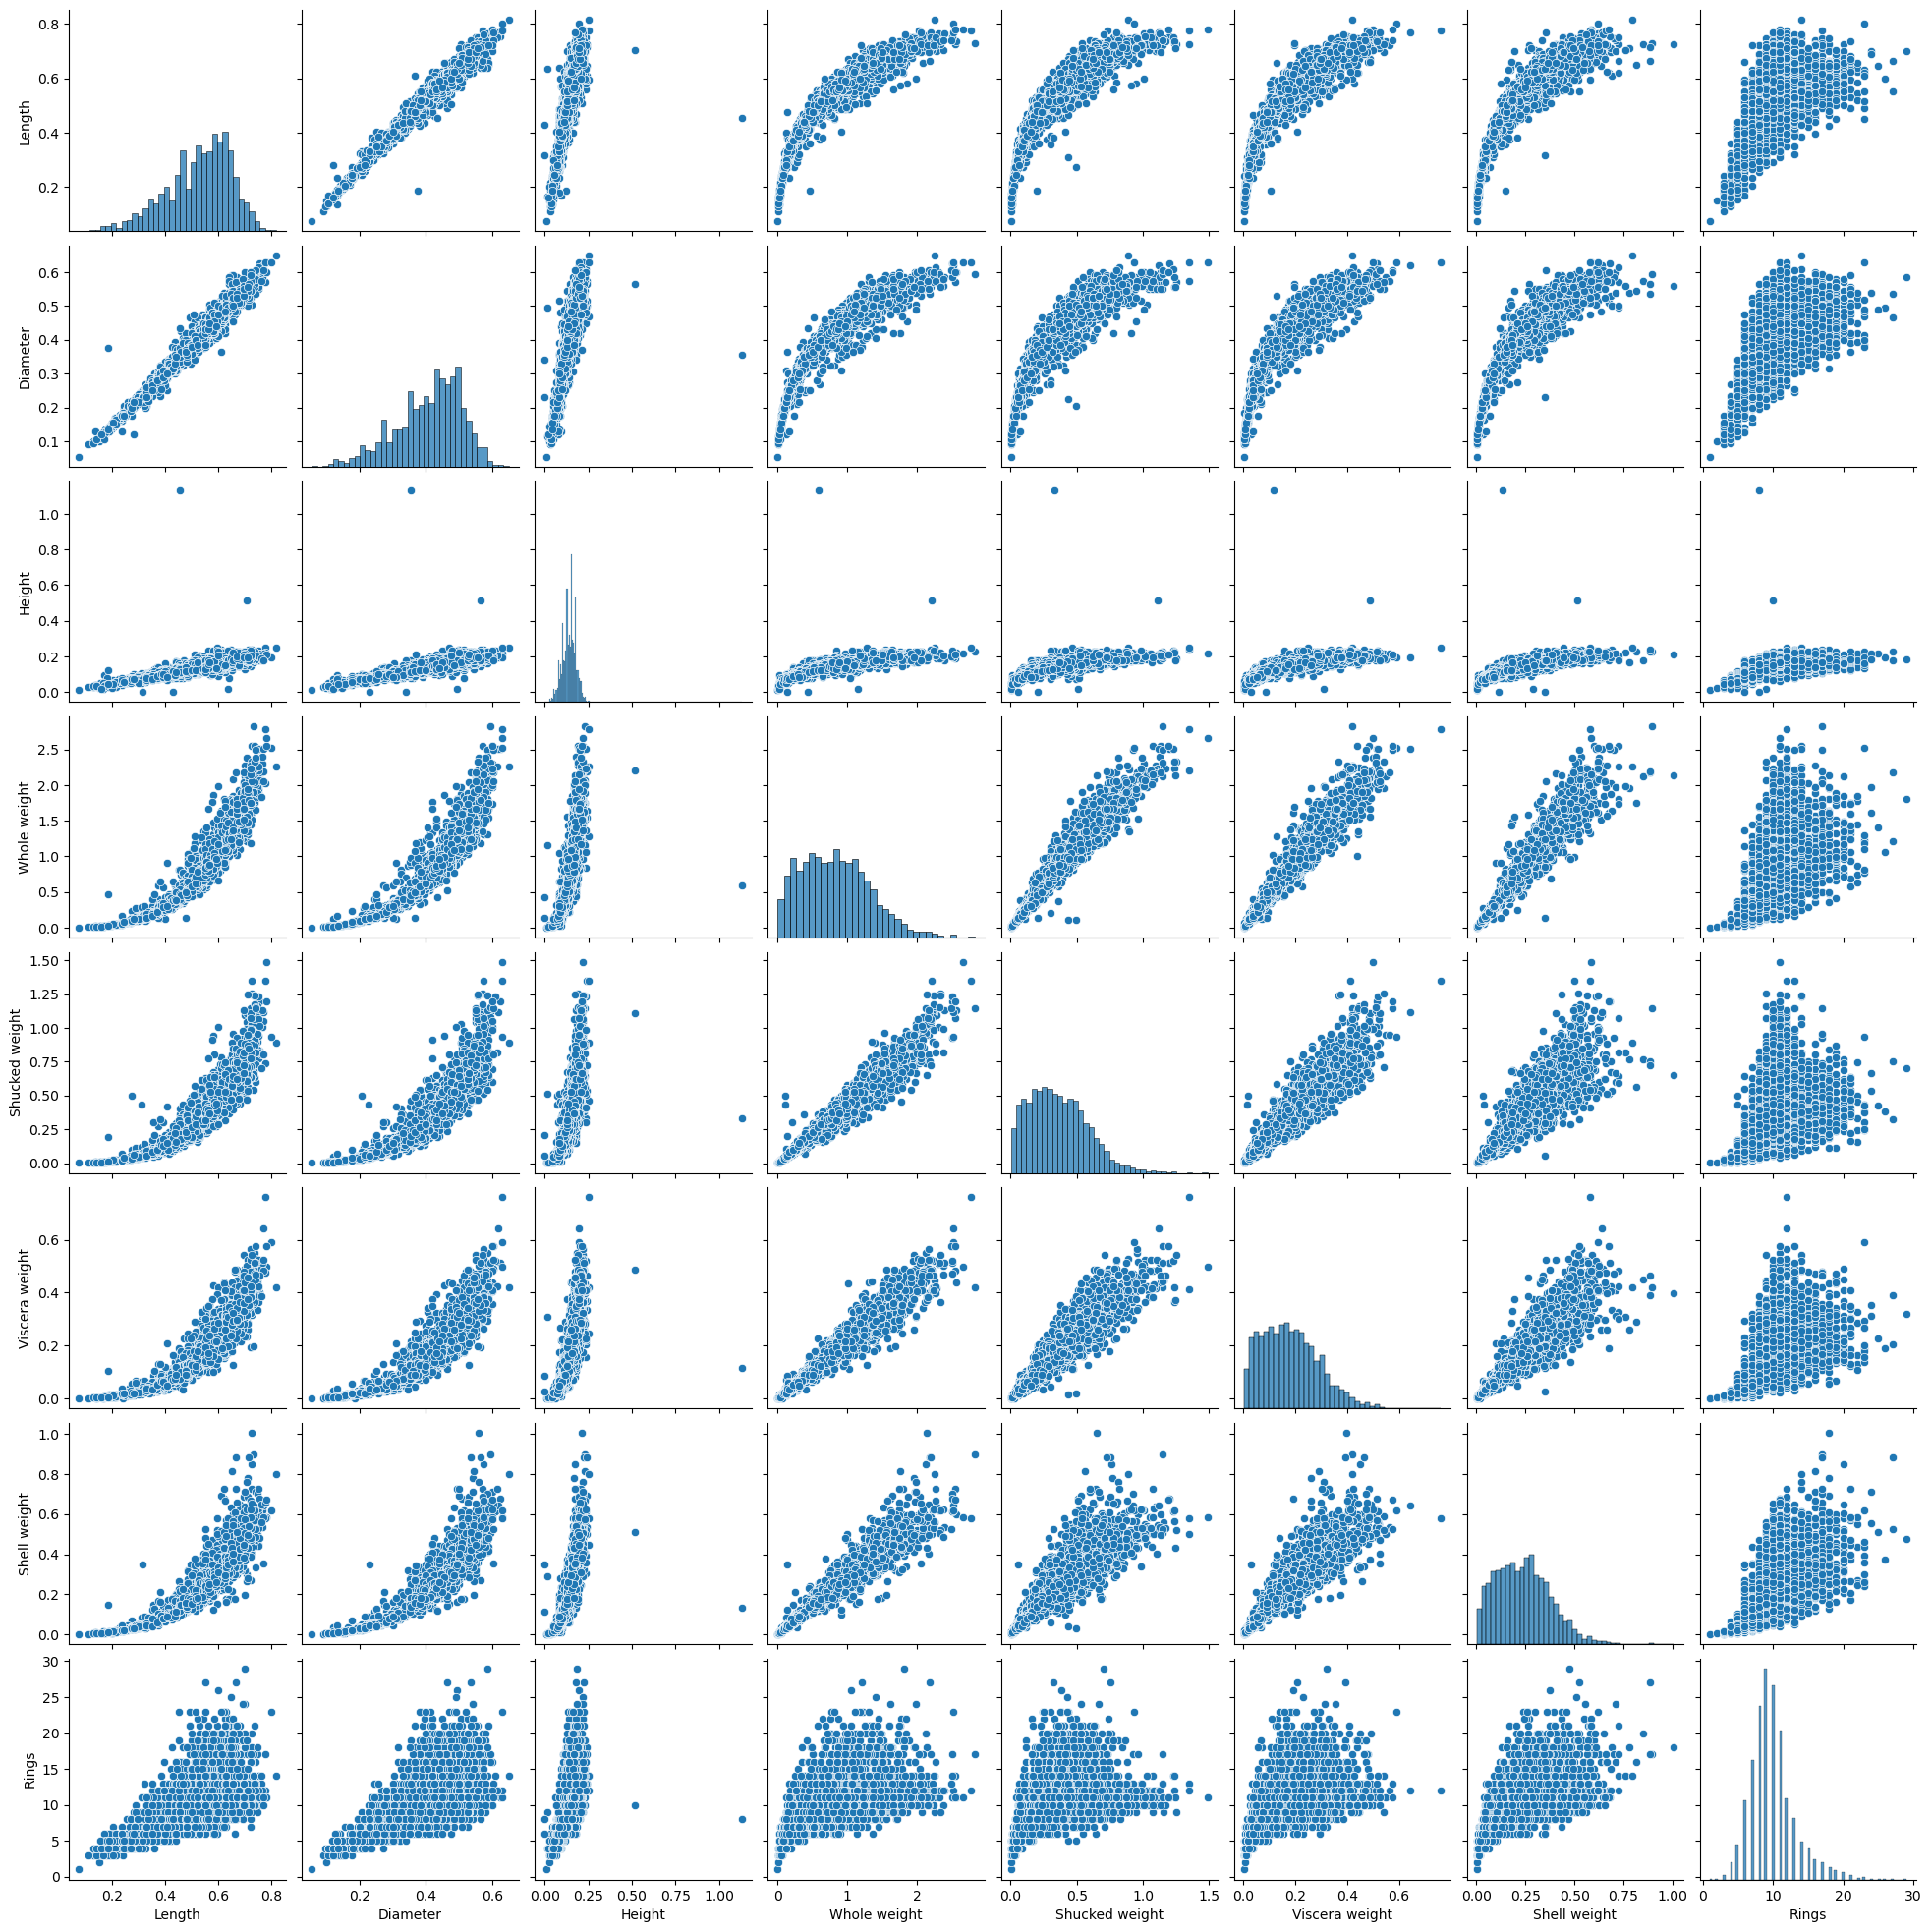

In [13]:
sns.pairplot(data)

Descriptive statistics

In [14]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [15]:
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [16]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Find the outliers

In [17]:
data.skew()

C:\Users\sures\AppData\Local\Temp\ipykernel_17596\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Rings'>

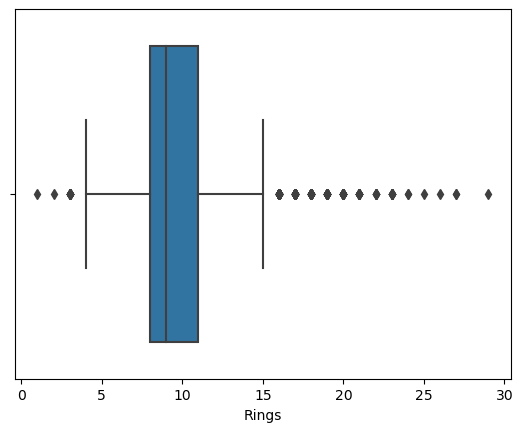

In [18]:
sns.boxplot(x=data['Rings'],data=data)

<AxesSubplot:>

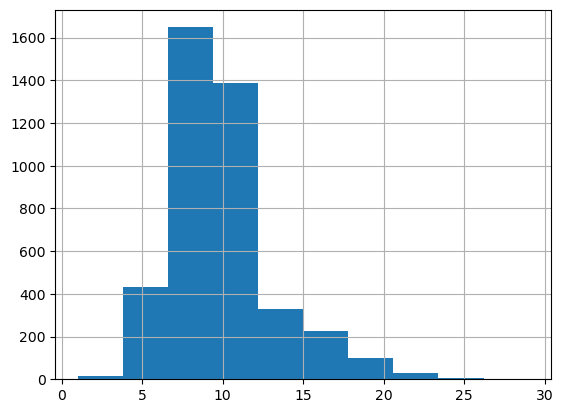

In [19]:
data['Rings'].hist()

In [20]:
print('skewness value of Age: ',data['Rings'].skew())

skewness value of Age:  1.114101898355677


In [21]:
Q1 = data['Rings'].quantile(0.25)
Q3 = data['Rings'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Rings']=np.where(data['Rings']>upper_whisker,upper_whisker,np.where(data['Rings']<lower_whisker,lower_whisker,data['Rings']))

<AxesSubplot:xlabel='Rings'>

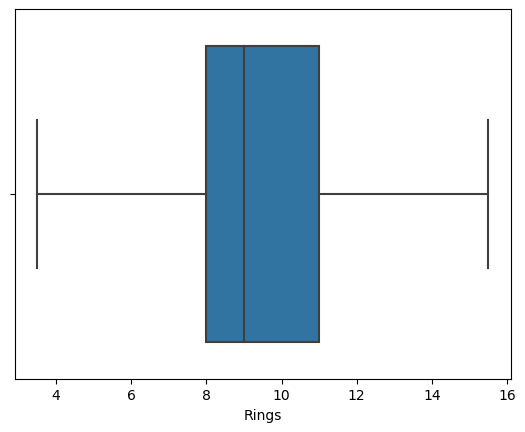

In [22]:
sns.boxplot(x=data['Rings'],data=data)

Categorical encoding

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['Sex']=le.fit_transform(data['Sex'])

In [25]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [26]:
data["Sex"].unique()

array([2, 0, 1])

Split the data into training and testing

In [27]:
data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [28]:
X = data.iloc[:, 0:7]
Y = data.iloc[:,-1]

In [29]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395
...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610


In [30]:
Y

0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Rings, Length: 4177, dtype: float64

In [31]:
Y.shape

(4177,)

Scale the independent variables

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

Split the data into training and testing

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1)

Build the Model

In [34]:
import csv
with open("abalone.csv") as csv_file:
    csv_reader = csv.reader(csv_file)
    data = pd.DataFrame([csv_reader], index = None)
for val in list(data[1]):
    print(val)

['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15']


Training and Testing Module

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

1.Linear Regression

In [36]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
lr_test_pred = lr.predict(x_test)

In [38]:
lr_test_pred

array([8.49722433, 7.64369059, 7.82520883, ..., 8.55677832, 9.02884473,
       5.96561877])

In [39]:
mse = mean_squared_error(y_test, lr_test_pred)
print('Mean Squared error of testing Set: %2f'%mse)

Mean Squared error of testing Set: 3.524602


In [40]:
p = r2_score(y_test, lr_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of testing set:0.52


2.Ridge

In [41]:
ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(x_train, y_train)
ridge_mod.fit(x_test, y_test)

D:\Apps\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
D:\Apps\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline impo

Ridge(alpha=0.01, normalize=True)

In [42]:
ridge_model_pred = ridge_mod.predict(x_test)

In [43]:
ridge_model_pred

array([8.54031033, 8.48463396, 7.96838487, ..., 8.77493484, 9.03881023,
       5.83582085])

In [44]:
acc = r2_score(y_test, ridge_model_pred)
print('Score of testing Set: %2f'%acc)

Score of testing Set: 0.523227


3.Decision Tree Regression

In [45]:
dt =  DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [46]:
dt_test_pred = dt.predict(x_test)

In [47]:
dt_test_pred

array([11.,  9., 10., ...,  6.,  7.,  4.])

In [48]:
dacc = mean_squared_error(y_test, dt_test_pred)
print('Mean Squared Error of testing Set: %2f'%dacc)

Mean Squared Error of testing Set: 6.413278


4.KNN Regression

In [49]:
knn = KNeighborsRegressor(n_neighbors = 4 )
knn.fit(x_train, y_train)
knn.fit(x_test, y_test)

KNeighborsRegressor(n_neighbors=4)

In [50]:
knn_test_pred = knn.predict(x_test)

In [51]:
knn_test_pred

array([ 8.75,  9.5 , 10.5 , ...,  8.  ,  7.5 ,  5.  ])

In [52]:
kacc= r2_score(knn_test_pred,y_test)
print('Score of testing Set: %2f'%kacc)

Score of testing Set: 0.400555


In [53]:
kmse = mean_squared_error(knn_test_pred,y_test)
print('Score of testing Set: %2f'%kmse)

Score of testing Set: 2.602460
